In [23]:
import matplotlib.pyplot as plt
import numpy as np
import json
#import seaborn as sns; sns.set()
import pandas as pd

In [24]:
def read_file(file_name):
    s = open(file_name).read().strip()
    return np.array(json.loads(json.loads(s)))

In [25]:
train_losses_adam = read_file('cifar_100_adamtrain_losses.json')
train_losses_lookahead = read_file('cifar_100_lookaheadtrain_losses.json')

In [26]:
train_accuracies_adam = read_file('cifar_100_adamtrain_accuracies.json')
train_accuracies_lookahead = read_file('cifar_100_lookaheadtrain_accuracies.json')

In [27]:
test_accuracies_adam = read_file('cifar_100_adamtest_accuracies.json')
test_accuracies_lookahead = read_file('cifar_100_lookaheadtest_accuracies.json')


In [29]:
print ("Adam Accuracy over multiple seeds: ",np.mean(np.max(test_accuracies_adam,axis=1)))
print ("Lookahead Accuracy over multiple seeds: ",np.mean(np.max(test_accuracies_lookahead,axis=1)))

Adam Accuracy over multiple seeds:  0.6732500195503235
Lookahead Accuracy over multiple seeds:  0.6798499822616577


In [7]:
test_losses_adam = read_file('cifar_100_adamtest_losses.json')
test_losses_lookahead = read_file('cifar_100_lookaheadtest_losses.json')

In [8]:
# test_accuracies_adam == train_accuracies_adam

In [9]:
def concat_list(lst):

    df1 = pd.DataFrame()
    df1['epochs'] = np.arange(1,201)
    df1['value'] = lst[0]
    
    df2 = pd.DataFrame()
    df2['epochs'] = np.arange(1,201)
    df2['value'] = lst[1]
    
    return pd.concat((df1,df2))
    
    

In [10]:
adam_losses = concat_list(train_losses_adam)

In [11]:
lookahead_losses = concat_list(train_losses_lookahead)

In [12]:
# sns.lineplot(x='epochs', y='value',data=adam_losses)
# sns.lineplot(x='epochs', y='value',data=lookahead_losses)
# plt.ylim(0,5)

In [13]:
def plot_everything(data1,data2,title):
    print (np.mean(data1))
    print (np.mean(data2))
    plt.figure(figsize=(10,10))
    plt.plot(np.mean(data1,axis=0),label="Adam")
    plt.plot(np.mean(data2,axis=0),label="Lookahead")
    plt.xlabel("Epoch")
    plt.ylabel(title.split()[-1])
    plt.title(title)
    plt.legend()

2.5422598855576513
2.5068414303531648


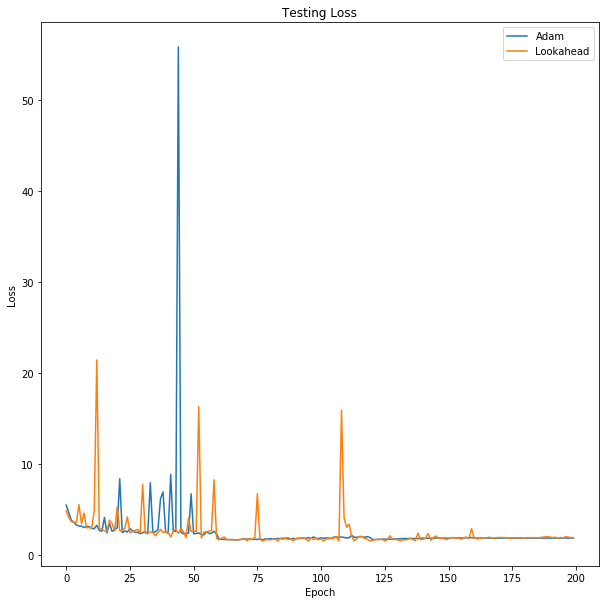

In [14]:
plot_everything(test_losses_adam,test_losses_lookahead,"Testing Loss")

0.5871217501536011
0.5780224997876212


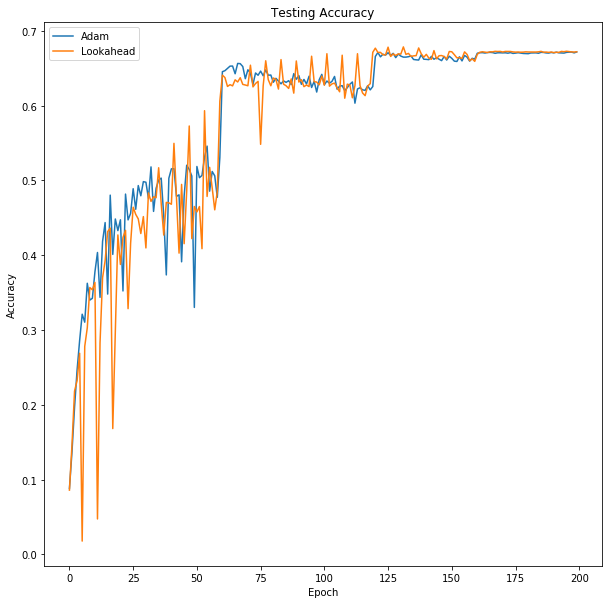

In [15]:
plot_everything(test_accuracies_adam,test_accuracies_lookahead,"Testing Accuracy" )

0.7563573503680527
0.7268495509075001


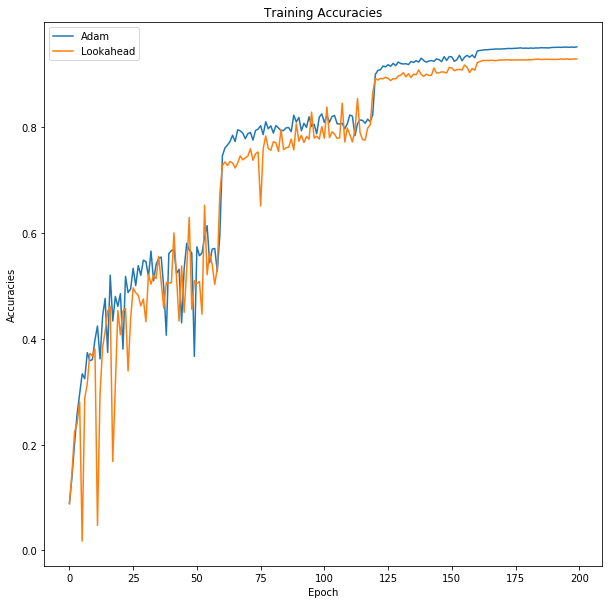

In [16]:
plot_everything(train_accuracies_adam,train_accuracies_lookahead,"Training Accuracies" )

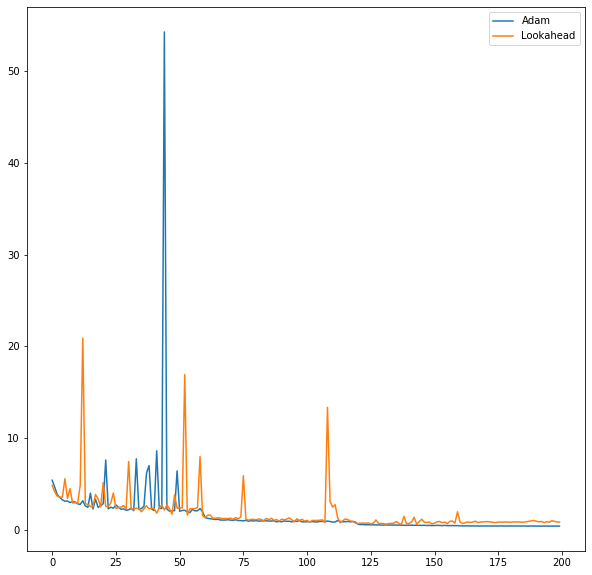

In [17]:

plt.figure(figsize=(10,10))
plt.plot(np.mean(train_losses_adam,axis=0),label="Adam")
plt.plot(np.mean(train_losses_lookahead,axis=0),label="Lookahead")
plt.legend()